<a href="https://colab.research.google.com/github/andrea0026/proyecto2/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, plot_confusion_matrix
from IPython.core.pylabtools import figsize

In [29]:
df = pd.read_csv('/content/drive/MyDrive/Data_science/Machine learning/archivos/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Primera opción: conjunto de datos 1

1) Fuente de datos: https://www.kaggle.com/datasets/adityakadiwal/water-potability

2) Breve descripción de datos: Este data set muestra 9 caracteristicas sobre la calidad del agua, a partir de estas se determina si el agua es potable o no.


Diccionario de los datos:
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

## Proyecto 2 - Parte 2 (base) 

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

In [ ]:
#validación de columnas o características
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
#validar si existen columnas duplicadas
df.duplicated().any()

False

In [ ]:
#Identificar y abordar los valores faltantes
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.shape

(3276, 10)

In [19]:
# Dada la información anterior, decido aplicar la estrategia de imputación, para abordar los datos faltantes con el promedio.
# Crear Pipeline:

num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, scaler)

In [ ]:
#Identificar valores atípicos

df.describe().round(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


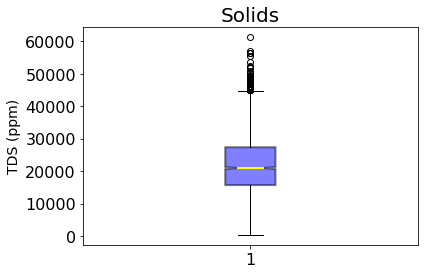

In [ ]:
#Parece que la colunma Solids tiene valores atípicos es asi que valido con una gráfica de boxplot.

tds = df['Solids']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.15,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('TDS (ppm)', fontsize = 14);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Solids', fontdict={'fontsize': 20});

Segun el gráfico anterior se presenta un número importante de valores atípicos a partir de 45.000

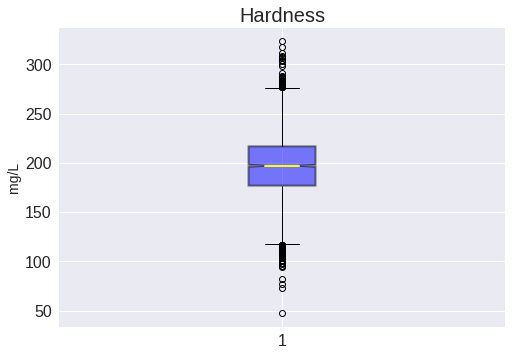

In [ ]:
# Ahora veamos el comportamiento de los datos de la colunma Hardness tambien con un gráfico Boxplot.
tds = df['Hardness']
plt.boxplot([tds],
                        notch=True,
                        patch_artist=True,
                        widths=.15,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('mg/L', fontsize = 14);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Hardness', fontdict={'fontsize': 20});

Hardness presenta valores atipicos por debajo de 120 mg/L y por encima de 280 mg/L, sin embargo en el gráfico de histograma siguiente vemos que los datos se comportan como una distribución normal.

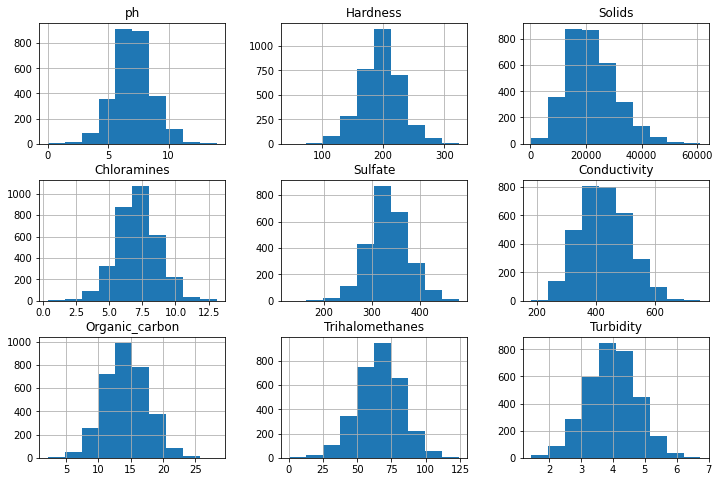

In [ ]:
#Gráfico univariante de todas las caracteristicas, cada histograma muestra el comportamiento de los datos 
df.drop('Potability', axis=1).hist(figsize=(12,8));

Según la fuente de la información, el rango de PH recomendado para la salud es de 6.5 a 8.5. En el gráfico 1 podemos observar que hay algunos valores por fuera de este rango, lo que puede afectar la potabilidad del agua.

La cantidad deseable de Solidos en el agua es de 500 mg/l y máximo de 1000 mg/l, el grafico 3 muestra gran cantidad de datos por fuera de este límite, afectando también la potabilidad del agua.

El nivel de cloro máximo debe ser de 4 mg/L, los datos en el grafico muestran un nivel elevado de cloro, lo mismo sucede con el carbono orgánico cuyo valor máximo debe ser de 4 mg/L.

La turbidez del agua muestra algunos valores por encima del nivel permitido, 5 NTU.

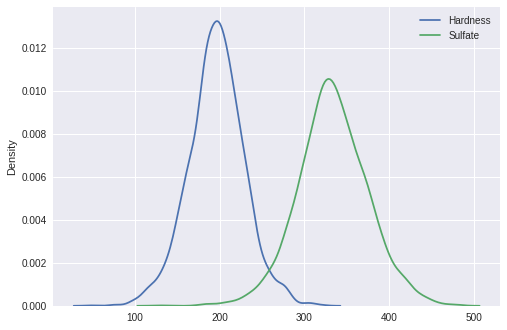

In [ ]:
# Dos curvas de distribución para Hardness y Sulfates que representan igual unidad de medida mg/L
plt.style.use('seaborn')
sns.kdeplot(df['Hardness']);
sns.kdeplot(df['Sulfate']);
plt.xlabel('')
plt.legend(labels=['Hardness','Sulfate']);

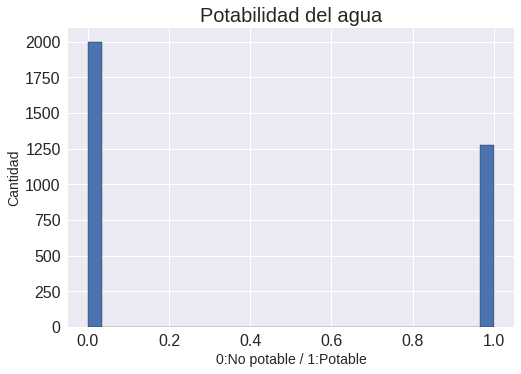

In [ ]:
# Ahora veamos el comportamiento de los datos para la columna objetivo, Potability.
plt.style.use('seaborn')
df['Potability'].hist(bins=30, edgecolor='black');

plt.ylabel('Cantidad', fontsize = 14);
plt.xlabel('0:No potable / 1:Potable', fontsize = 14);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
plt.title('Potabilidad del agua', fontdict={'fontsize': 20});

In [ ]:
#Casi el 61% porciento de los datos  pertenece a agua no potable, y el 39% restante a agua que si es potable.
df['Potability'].value_counts(normalize = True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

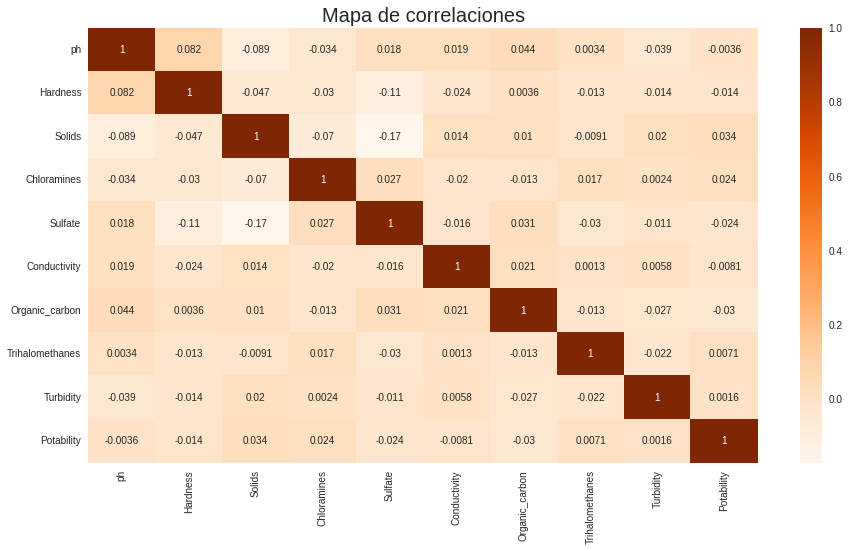

In [ ]:
#producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

plt.figure(figsize = (15,8))
correlations = df.corr();
sns.heatmap(correlations, cmap='Oranges' , annot=True);
plt.title('Mapa de correlaciones', fontdict={'fontsize': 20});

El mapa de calor muestra que no existe ninguna correlación entre las caracteristicas ya que cada coeficiente es cercano a cero.

# Proyecto 2 - Parte 4

* Garantiza que completes los pasos de preprocesamiento adecuados.
* Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final)
* Evalúa el rendimiento del modelo con las métricas adecuados para el modelo
* Elije tu modelo de “producción” y justifica esta decisión
* Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros

In [30]:
# crear matrix de cracteristicas y vector objetivo
y = df['Potability']
X = df.drop(columns='Potability')
#Aplicar train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
#Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.
num_selector = make_column_selector(dtype_include='number')
mean_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
# crear pipeline numerico con los datos escalados
num_pipe = make_pipeline(mean_imputer, scaler)

In [40]:
# Tuples para Column Transformer
number_tuple = (num_pipe, num_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple)
# fit on train
preprocessor.fit(X_train)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Modelo de Regresión logística:

In [9]:
# Crear modelo de Regresión logística 
log = LogisticRegression()
logreg = make_pipeline(num_pipe, log)

In [46]:
#Entrenar el modelo
logreg.fit(X_train_processed, y_train)
#Evaluar el modelo
scores = logreg.score(X_test_processed, y_test)
scores

0.6227106227106227

In [42]:
#Afinar el hiperparametro L1

c_list = [0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
# Ciclo For para encontrar el mejor valor de c
for c in c_list:
  log_r = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  # pipeline con el modelo y num scaler/imputer.
  log_r_pipe = make_pipeline(num_pipe, log_r)
  log_r_pipe.fit(X_train_processed, y_train)
  # Evaluar el modelo 
  train_scores.append(log_r_pipe.score(X_train_processed, y_train))
  test_scores.append(log_r_pipe.score(X_test_processed, y_test))

{0.001: 0.623,
 0.01: 0.623,
 0.1: 0.623,
 1: 0.623,
 10: 0.623,
 100: 0.623,
 1000: 0.623}

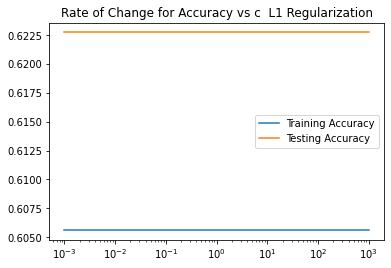

In [43]:
#plot the change in accuracy vs value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_list, train_scores, label='Training Accuracy')
ax.plot(c_list, test_scores, label='Testing Accuracy')
ax.set_xticks(c_list)
ax.set_title('Rate of Change for Accuracy vs c  L1 Regularization')
ax.legend()
 
#setting x axis to log scale 
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:round(score,3) for c, score in zip(c_list, test_scores)}

{0.0001: 0.6227106227106227,
 0.001: 0.6227106227106227,
 0.01: 0.6227106227106227,
 0.1: 0.6227106227106227,
 1: 0.6227106227106227,
 10: 0.6227106227106227,
 100: 0.6227106227106227,
 1000: 0.6227106227106227}

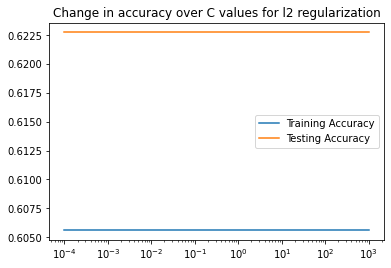

In [44]:
#Afinación de L2

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [47]:
#Encontar el mejor hiperparametro usando gridsearch
params = {'penalty':['l1','l2'],
          'C':[0.0001, .001, .01, 1, 10],
          'class_weight': [None,'balanced']}

In [48]:
#Regresion logistica
log_reg = LogisticRegression(solver='liblinear')
#grid search
gs = GridSearchCV(log_reg, params, cv=5)
gs.fit(X_train_processed, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [49]:
gs.best_params_

{'C': 0.0001, 'class_weight': None, 'penalty': 'l1'}

In [51]:
print('accuracy de entrenamiento: ', gs.score(X_train_processed, y_train))
print('accuracy de prueba: ', gs.score(X_test_processed, y_test))

accuracy de entrenamiento:  0.6056166056166056
accuracy de prueba:  0.6227106227106227


In [53]:
#Guardar las predicciones
preds = gs.predict(X_test_processed)

In [55]:
#Crear reporte de clasificación
train_pred = logreg.predict(X_train_processed);
test_pred = logreg.predict(X_test_processed);
train_r = classification_report(y_train, train_pred, zero_division=0);
test_r = classification_report(y_test, test_pred, zero_division=0);
print(train_r, "\n\n\n")
print(test_r)

              precision    recall  f1-score   support

           0       0.61      1.00      0.75      1488
           1       0.00      0.00      0.00       969

    accuracy                           0.61      2457
   macro avg       0.30      0.50      0.38      2457
weighted avg       0.37      0.61      0.46      2457
 



              precision    recall  f1-score   support

           0       0.62      1.00      0.77       510
           1       0.00      0.00      0.00       309

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.39      0.62      0.48       819



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


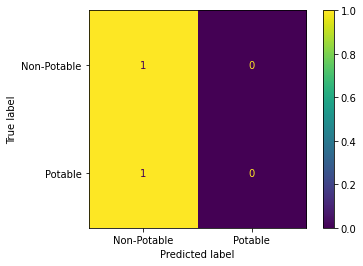

In [120]:
# Matriz de confusión
labels = ['Non-Potable', 'Potable']

plot_confusion_matrix(estimator=log_reg_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);

Modelo de KNN usando PCA:

In [100]:
#crear modelo PCA
pca = PCA(n_components=.95)

In [101]:
#inicializar el modelo KNN

knn = KNeighborsClassifier()

In [102]:
%%time
#crear modelo KNN
knn_pca_pipe = make_pipeline(scaler, pca, knn)
knn_pca_pipe.fit(X_train_processed, y_train)

CPU times: user 7.45 ms, sys: 4.1 ms, total: 11.5 ms
Wall time: 8.12 ms


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [103]:
#Evaluar modelo con PCA
knn_pca_acc = round(knn_pca_pipe.score(X_test_processed, y_test), 3)
knn_pca_acc

0.623

In [106]:
# Crear reporte de clasificación
train_knn_pca_pred = knn_pca_pipe.predict(X_train_processed)
test_knn_pca_pred = knn_pca_pipe.predict(X_test_processed)
# precision, recall y f1-score para los datos de entrenamiento y de prueba
train_report = classification_report(y_train, train_knn_pca_pred)
test_report = classification_report(y_test, test_knn_pca_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      1488
           1       0.75      0.59      0.66       969

    accuracy                           0.76      2457
   macro avg       0.76      0.73      0.74      2457
weighted avg       0.76      0.76      0.76      2457
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.68      0.76      0.71       510
           1       0.50      0.40      0.45       309

    accuracy                           0.62       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.62      0.61       819



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


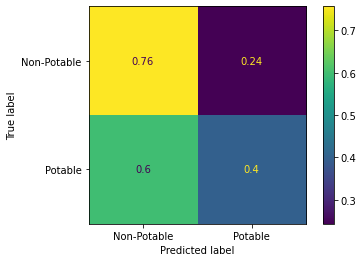

In [110]:
# Matriz de confusión
labels = ['Non-Potable', 'Potable']

plot_confusion_matrix(estimator=knn_pca_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);

In [111]:
#Dado que aplicando PCA se obtuvo buenos resultados, realizaré una copia para continuar el trabajo.

df2 = df.copy()
y2 = df2['Potability']
X2 = df2.drop(columns='Potability')
# train - split con PCA
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

Modelo arbol de desición:

In [112]:
# Inicializar modelo de arbol con 2 de profundidad
dec_tree = DecisionTreeClassifier(max_depth=2)
# standarizar los datos
dt_pipe = make_pipeline(num_pipe, dec_tree)
# Entrenar los datos
dt_pipe.fit(X_train_processed, y_train)
# Evaluar el modelo
dt_score = dt_pipe.score(X_test, y_test)
dt_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6227106227106227

In [113]:
# Diccionario de parametros para usar Grid Search
param_grid = {'decisiontreeclassifier__max_depth':[3,5, 10],
              'decisiontreeclassifier__min_samples_leaf':[1, 2, 3],
              'decisiontreeclassifier__min_samples_split':[50, 125, 250]}

In [114]:
# Afinar parametros
dt_grid_search = GridSearchCV(dt_pipe, param_grid)
# Entrenar el modelo
dt_grid_search.fit(X_train_processed, y_train)
# ver los mejores parametros
dt_grid_search.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 50}

In [116]:
# Crear el arbol de desición con los mejores parametros
best_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=50)
# Crear pipeline
dt_best_pipe = make_pipeline(num_pipe, best_tree)
# Entrenar el modelo
dt_best_pipe.fit(X_train_processed, y_train)
# Evaluar el modelo
dt_best_score = dt_pipe.score(X_test_processed, y_test)
dt_best_score

0.6324786324786325

Vemos que el modelo mejoró en un 1% al afinar los parametros, lo que no paso con el modelo de regresión logistica ni KNN.

In [117]:
# Crear reporte de clasificación
train_tree_pred = dt_best_pipe.predict(X_train_processed)
test_tree_pred = dt_best_pipe.predict(X_test_processed)
# precision, recall y f1-score para los datos de entrenamiento y de prueba
train_report = classification_report(y_train, train_tree_pred)
test_report = classification_report(y_test, test_tree_pred)
print(f'Classification Report for Training Set\n {train_report} \n\n')
print('Classification Report for Testing Set\n', test_report)

Classification Report for Training Set
               precision    recall  f1-score   support

           0       0.66      0.94      0.78      1488
           1       0.74      0.24      0.37       969

    accuracy                           0.67      2457
   macro avg       0.70      0.59      0.57      2457
weighted avg       0.69      0.67      0.61      2457
 


Classification Report for Testing Set
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       510
           1       0.59      0.21      0.31       309

    accuracy                           0.65       819
   macro avg       0.62      0.56      0.53       819
weighted avg       0.63      0.65      0.59       819



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


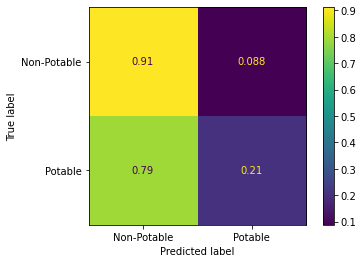

In [118]:
# Matriz de confusión
labels = ['Non-Potable', 'Potable']

plot_confusion_matrix(estimator=dt_best_pipe, display_labels=labels, X=X_test_processed, 
                      y_true=y_test, normalize='true');
plt.grid(False);

El mejor modelo en este ejercio es el de arboles de desición, ya que presenta menor cantidad de falsos positivos y predice mejor a los verdaderos negativos en comparación con el modelo de KNN y de arbol de desición que parece presentar overfiting.  Ademas es el arroja mejor resultado de accuracy 63,24 %.
